In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [240]:
data = pd.read_csv('spam.csv')

In [241]:
data

,Label,EmailText,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
data = data.iloc[:, :2]

In [243]:
data

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [244]:
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [245]:
data.tail()

,Label,EmailText
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [247]:
data.describe()

,Label,EmailText
count,5572,5571
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


In [248]:
data.isnull()

,Label,EmailText
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [249]:
# 1. Fill missing text
data.loc[:, 'EmailText'] = data['EmailText'].fillna('')

# 2. Map labels
data.loc[:, 'Label'] = data['Label'].map({'ham': 0, 'spam': 1})

# 3. Explicitly tell pandas to infer the new numeric types to resolve the warning
data = data.infer_objects(copy=False)

# 4. Final fill and cast for the Label column
data.loc[:, 'Label'] = data['Label'].fillna(0).astype(int)

# 5. define arrays
X = data['EmailText'].values
y = data['Label'].values

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [251]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [252]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

Final Model Accuracy: 98.21%

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       0.98      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



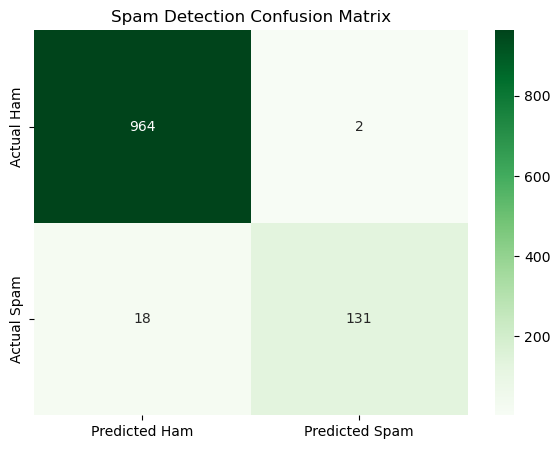

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1. Generate predictions for the test set
y_pred = model.predict(X_test_cv)

# 2. Print the overall accuracy
print(f"Final Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# 3. Create a detailed Classification Report for GitHub documentation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# 4. Plot the Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Ham', 'Predicted Spam'], 
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Spam Detection Confusion Matrix')
plt.show()

In [254]:
def spam_filter_test(text):
    temp_cv = cv.transform([text])
    res = model.predict(temp_cv)
    return " SPAM" if res[0] == 1 else " HAM"

# Test 1: Typical Spam
print(f"Test 1: {spam_filter_test('URGENT: Your bank account is locked. Click here to verify!')}")

# Test 2: Personal Ham
print(f"Test 2: {spam_filter_test('Hey Riya, did you finish the CDAC assignment?')}")

Test 1:  SPAM
Test 2:  HAM


In [255]:
import pickle

# Save the trained model and the vectorizer
pickle.dump(model, open('spam_model.pkl', 'wb'))
pickle.dump(cv, open('vectorizer.pkl', 'wb'))

print("Files 'spam_model.pkl' and 'vectorizer.pkl' are ready for GitHub!")

Files 'spam_model.pkl' and 'vectorizer.pkl' are ready for GitHub!
